# **ATS System with** 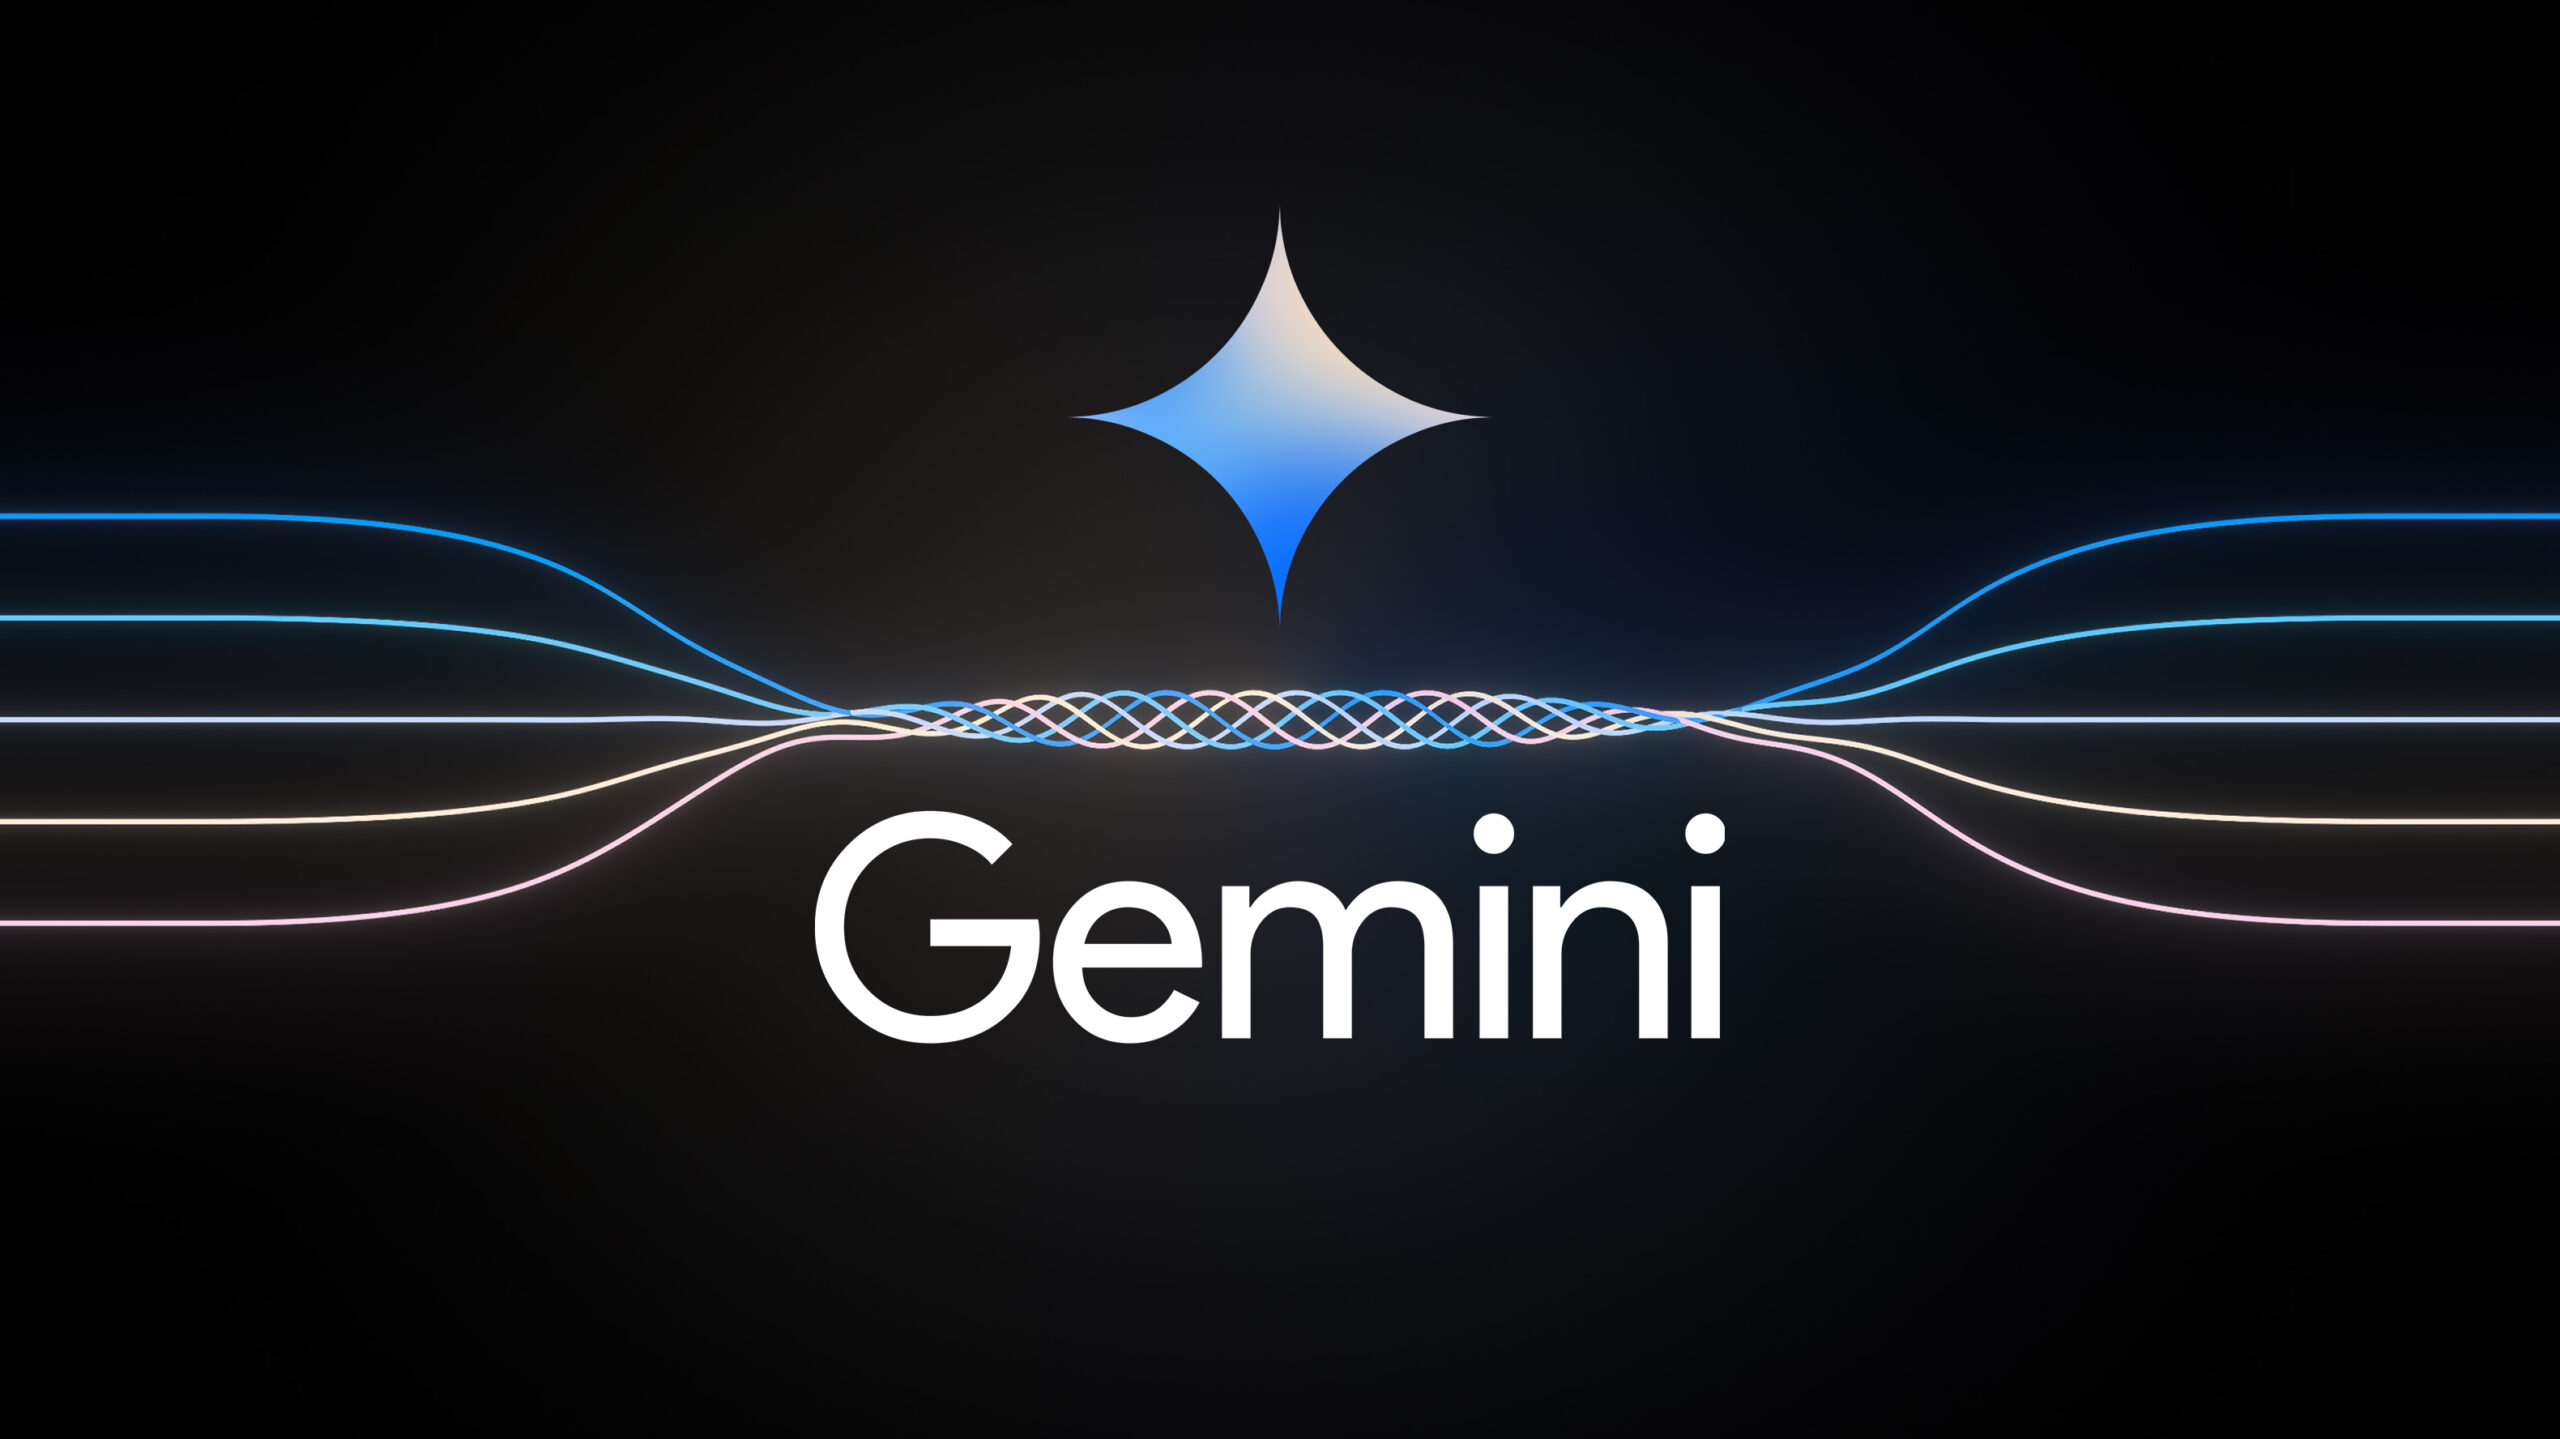

In [ ]:
# !pip install pdfminer.six

In [1]:
import re

import google.generativeai as genai

import plotly.express as px

from pdfminer.high_level import extract_text

from google.colab import userdata
from google.colab import files

In [2]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [3]:
uploaded = files.upload()

if len(uploaded) > 0:
    pdf_file_path = list(uploaded.keys())[0]
    resume_text = extract_text(pdf_file_path)
    print(resume_text)

Saving Resume.pdf to Resume (1).pdf
Abdullah Khaled 
Data Scientist 
dev.abdullah.khaled@gmail.com | LinkedIn | Portfolio | Github | +201557504902 | Beni Suef, Egypt  

SKILLS 

Programming Languages: Python, R, SQL 

• 
•  Deep Learning & Machine Learning: TensorFlow, Natural Language Processing (NLP), Generative AI, Python (scikit-

learn, numpy, pandas, matplotlib, pyspark, FastAPI, Flask, Streamlit) 

•  Data Science & Miscellaneous Technologies: Data science pipeline (cleansing, wrangling, visualization, modelling, 

interpretation), MySQL, MongoDB, Tableau, Power BI, Statistics, Time series, Experimental design, Hypothesis testing, 
OOP, APIs, Excel, Git, Web Scraping, Pattern Recognition 

EXPERIENCE  

WorldQaunt University. 
Applied Data Science Lab - Internship 

Remote  
May 2023 - May 2023  

•  Completed 8 data science projects with mastering skills in data manipulation, visualization, machine learning, time series 
analysis, supervised and unsupervised learning, PCA, stat

In [4]:
job_description = '''
Proven experience as a Data Scientist or a similar role
Strong proficiency in programming languages such as Python, R, or Scala
Experience with machine learning techniques and algorithms
Proficiency with data visualization tools and libraries such as Tableau or Matplotlib
Experience with big data tools and technologies, such as Hadoop or Spark
Excellent problem-solving and analytical skills
Strong communication and presentation skills
Ability to work effectively in a team environment
Experience in the sales or marketing field is a plus
'''

In [ ]:

# skills_section_match = re.search(r'SKILLS(.*?)(?:EXPERIENCE|EDUCATION|PROJECTS|$)', resume_text, re.DOTALL)
# if skills_next_section_match:
#     skills_section = skills_section_match.group(1).strip()
#     print("SKILLS Section:")
#     print(skills_section)
# else:
#     print("SKILLS section not found in the resume.")

In [5]:
prompt = f'''Extract skills section from: ${resume_text}
    then evaluate these skills with the job description in an only percentage number format e.g (70%): ${job_description}
    '''
prompt

'Extract skills section from: $Abdullah Khaled \nData Scientist \ndev.abdullah.khaled@gmail.com | LinkedIn | Portfolio | Github | +201557504902 | Beni Suef, Egypt  \n\nSKILLS \n\nProgramming Languages: Python, R, SQL \n\n• \n•  Deep Learning & Machine Learning: TensorFlow, Natural Language Processing (NLP), Generative AI, Python (scikit-\n\nlearn, numpy, pandas, matplotlib, pyspark, FastAPI, Flask, Streamlit) \n\n•  Data Science & Miscellaneous Technologies: Data science pipeline (cleansing, wrangling, visualization, modelling, \n\ninterpretation), MySQL, MongoDB, Tableau, Power BI, Statistics, Time series, Experimental design, Hypothesis testing, \nOOP, APIs, Excel, Git, Web Scraping, Pattern Recognition \n\nEXPERIENCE  \n\nWorldQaunt University. \nApplied Data Science Lab - Internship \n\nRemote  \nMay 2023 - May 2023  \n\n•  Completed 8 data science projects with mastering skills in data manipulation, visualization, machine learning, time series \nanalysis, supervised and unsupervis

In [6]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    prompt,
    generation_config=genai.types.GenerationConfig(
        candidate_count=1,
        max_output_tokens=5,
        temperature=0.01)
)

In [7]:
print(response.text)

75%


In [8]:
output_value = int((response.text).strip('%'))

fig = px.pie(names=['Matching', 'Not Matching'], values=[output_value, 100 - output_value],
             color_discrete_sequence=['#4fe051', '#eb3d3d'],
             labels={'Matching': f'{output_value}%', 'Not Matching': f'{100 - output_value}%'})

fig.update_layout(
    font=dict(size=20)
)

fig.show()